# Numerische Lösung von Differentialgleichungen

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

## Windwiderstand
$$\frac{dv(t)}{dt}=-\gamma v(t)^2$$
Die Lösuhg lautet
$$v(t)=\frac{1}{\gamma\cdot t+t}$$

In [2]:
def f(t,v):
    gamma = 0.1
    dvdt = -gamma*v**2
    return dvdt

In [28]:
'''
Wir benutzen 2 Methoden um die Differentialgleichung für die Abnahme der Geschwindigkeit 
durch den Windwiderstand zu berechnen. Einmal die Euler-Vorwärts Methode und zum anderen
die scipy Biblitheksroutine solve_ivp
'''
#
# Euler Vorwärts
t0 = 0.
t_max = 10.
n = 101
dt = (t_max-t0)/(n-1)   # Das einzelne Intervall ist dt=0.1 lang für n=101 Punktem und t_max=10.
#
v1 = np.zeros(n)
v1[0] = 1.
# zum neuen Zeitpunkt t+dt. Euler Vorwärtsintegration
for i in np.arange(1,n):
    v1[i] = v1[i-1]+f(1.,v1[i-1])*dt
#
# Scipy Bibliotheksroutine solve_ivp
vsc0 = [1.0]
t_eval = np.linspace(0,(n-1)*dt,n)
t_span = [t0,t_max]
sol1 = solve_ivp(f,t_span,vsc0,t_eval=t_eval, method = 'RK45', rtol = 1.e-8, atol = 1.e-10)
#
sol2 = solve_ivp(f,t_span,vsc0,t_eval=t_eval, method = 'RK23', rtol = 1.e-8, atol = 1.e-10)

<IPython.core.display.Javascript object>


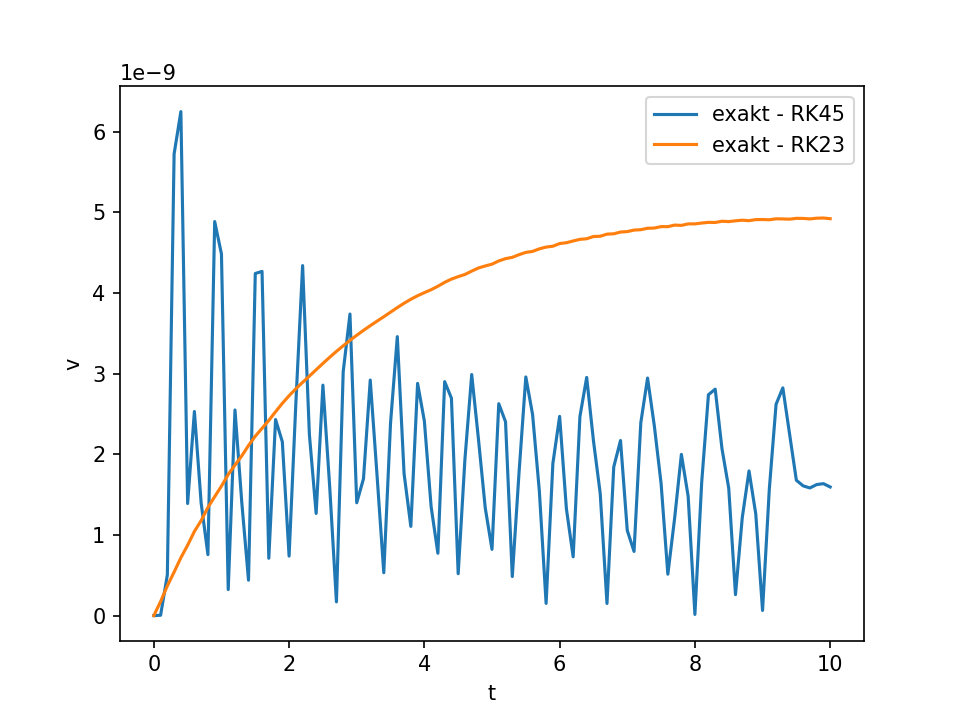

In [29]:
%matplotlib notebook
fig,ax = plt.subplots()
#
t = t_eval
v2 = 1./(0.1*t+1.)
v3 = sol1.y[0]
v4 = sol2.y[0]
#
ax.set_xlabel('t')
ax.set_ylabel('v')
#ax.plot(t, v2-v1, label = 'Euler')
#ax.plot(t, v2, label = 'exact')
#ax.plot(t,f(t_span,v2), label = 'Ableitung von v')
ax.plot(t, np.abs(v2-v3), label = 'exakt - RK45')
ax.plot(t, np.abs(v2-v4), label = 'exakt - RK23')
ax.legend()

## Der harmonische Oszillator
### Trägheitskraft + Federkraft = äußere Kraft
$$ m\cdot a(t) + k\cdot x(t) = f(t)$$
$$\dot{x}(t)=v(t)$$
$$\dot{v}(t)=-x(t)+f(t)$$

In [42]:
n = 1001
x = np.zeros(n)
v = np.zeros(n)
#
x[0] = 1.
v[0] = 0.
#
t0 = 0.
t_max = 100.

dt = (t_max-t0)/(n-1)   
# zuerst f(t)=0 und Euler vorwärts
for i in np.arange(1,n):
    x[i] = x[i-1] + v[i-1]*dt
    v[i] = v[i-1] -0.1*v[i-1]*dt - x[i]*dt

In [44]:
def g(t,y):
    x , v = y
    dxdt = v
    dvdt = -x
    return [dxdt,dvdt]

<IPython.core.display.Javascript object>


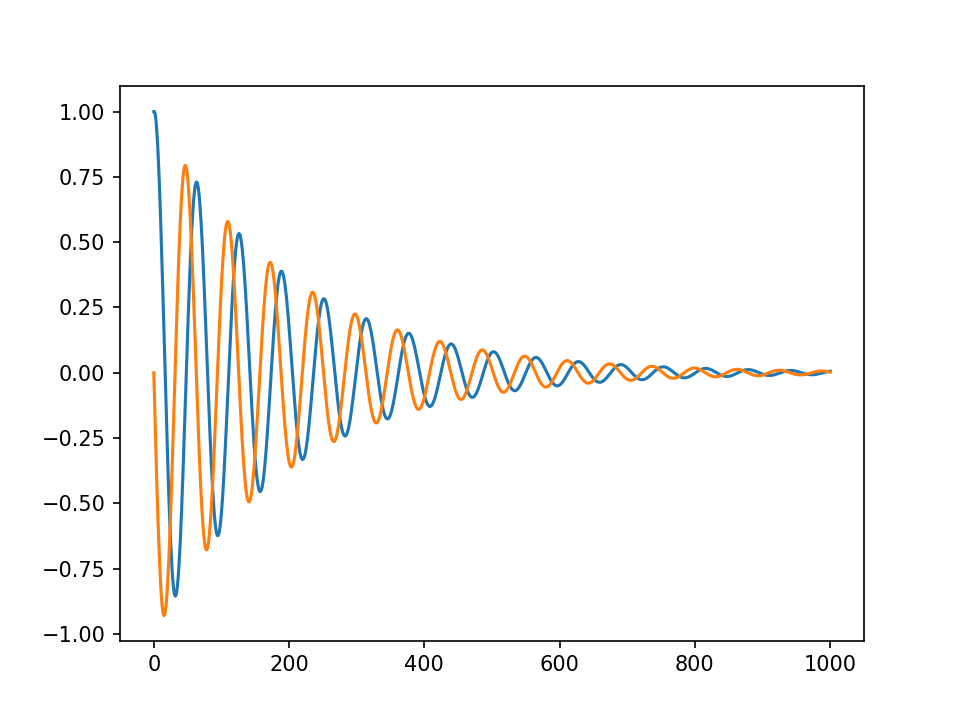

In [43]:
%matplotlib notebook
fig,ax = plt.subplots()
#
ax.plot(x)
ax.plot(v)